# Final Project - MSCA 31008 Data Mining Principles

**Author**: Devanshi Verma
<br>
**Topic**: Kaggle Challenge: Airbnb New User Bookings
<br>
**Goal**: Where will a new guest book their first travel experience?
<br>
**Link**:https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview/description
<br>
**Instructor**: Anil Chaturvedi


**Importing the files and loading the dataset**

In [2]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Importing all the datasets
#Training Set of users
train_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/train_users_2.csv')
#Testing Set of users
test_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/test_users.csv')
#web sessions log for users
sessions=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sessions.csv')
#Loading the summary stats of countries
countries=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/countries.csv')
#Summary stats of user age
age_gender_bkts=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/age_gender_bkts.csv')
#Sample submission
sample_submission=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sample_submission_NDF.csv')

In [37]:
#converting the date values to datetime
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['timestamp_first_active'] = pd.to_datetime(train_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['timestamp_first_active'] = pd.to_datetime(test_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_users.head()
test_users.head()

id date_account_created timestamp_first_active date_first_booking  \
0  5uwns89zht           2014-07-01    2014-07-01 00:00:06                NaT   
1  jtl0dijy2j           2014-07-01    2014-07-01 00:00:51                NaT   
2  xx0ulgorjt           2014-07-01    2014-07-01 00:01:48                NaT   
3  6c6puo6ix0           2014-07-01    2014-07-01 00:02:15                NaT   
4  czqhjk3yfe           2014-07-01    2014-07-01 00:03:05                NaT   

      gender   age signup_method  signup_flow language affiliate_channel  \
0     FEMALE  35.0      facebook            0       en            direct   
1  -unknown-   NaN         basic            0       en            direct   
2  -unknown-   NaN         basic            0       en            direct   
3  -unknown-   NaN         basic            0       en            direct   
4  -unknown-   NaN         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

In [38]:
sessions.head()

user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

In [41]:
countries.head()

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393303       -96.818146    2828.1333   
2                  DE        51.165707        10.452764    7879.5680   
3                  ES        39.896027        -2.487694    7730.7240   
4                  FR        46.232193         2.209667    7682.9450   

   destination_km2 destination_language   language_levenshtein_distance  
0        7741220.0                   eng                           0.00  
1        9984670.0                   eng                           0.00  
2         357022.0                   deu                          72.61  
3         505370.0                   spa                          92.25  
4         643801.0                   fra                          92.06

In [42]:
age_gender_bkts.head()

age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0

In [43]:
sample_submission.head()

id country
0  5uwns89zht     NDF
1  jtl0dijy2j     NDF
2  xx0ulgorjt     NDF
3  6c6puo6ix0     NDF
4  czqhjk3yfe     NDF

# EDA

In [9]:
#Function to get distribution graphs

def get_distr(feature):
    sns.set()
    plt.figure(figsize=(10,8))
    sns.barplot(train_users[feature].value_counts().index,train_users[feature].value_counts(),palette="husl")
    

**Gender**

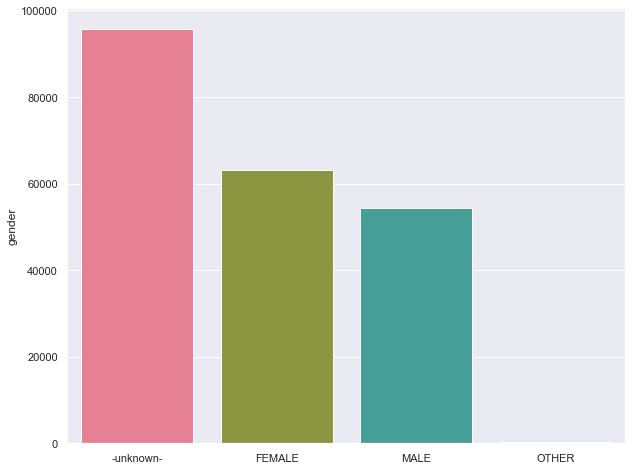

In [80]:
get_distr('gender')

**Desination Distribution**

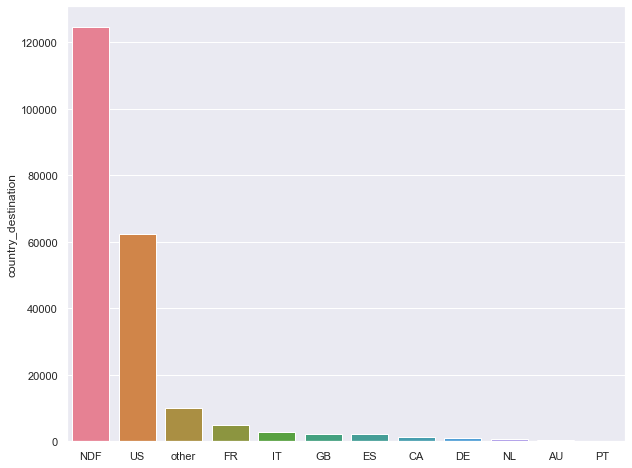

In [81]:
get_distr('country_destination')

**Signup Method**

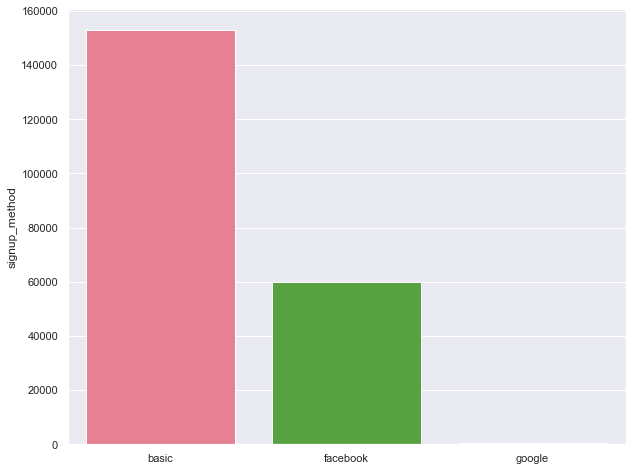

In [82]:
get_distr('signup_method')

**age distribution**

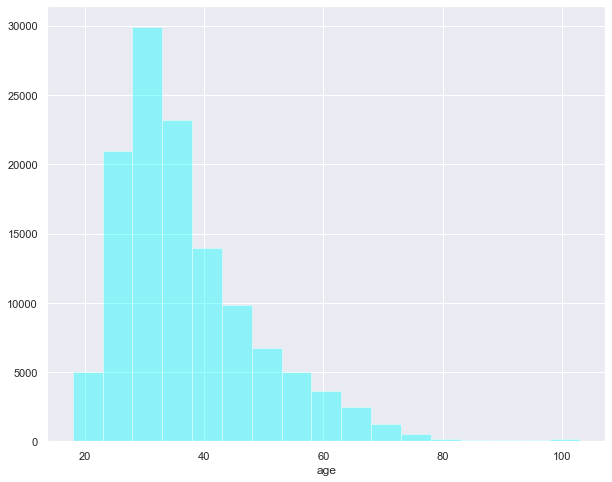

In [83]:
#get_distr('age')
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(train_users['age'],color="cyan",bins=np.arange(18,100+5,5),kde=False)

In [84]:
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

**language distribution**

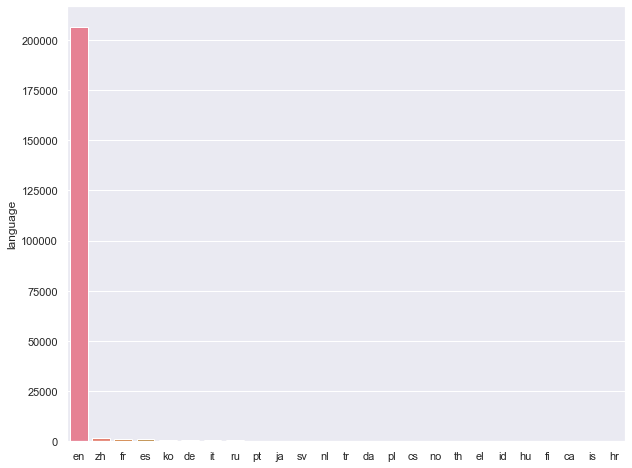

In [85]:
get_distr('language')

**Signup app**

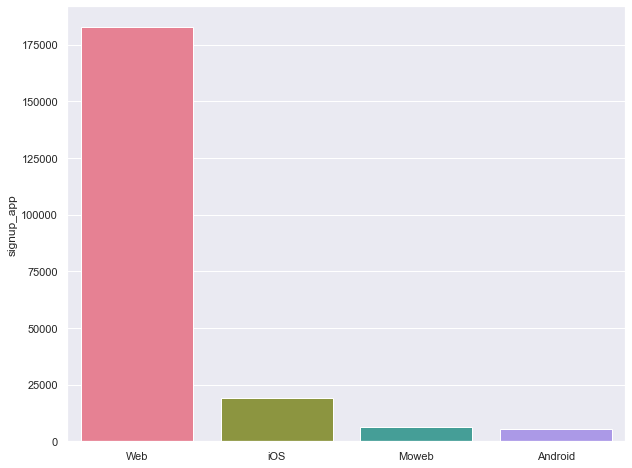

In [86]:
get_distr('signup_app')

**first device type**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

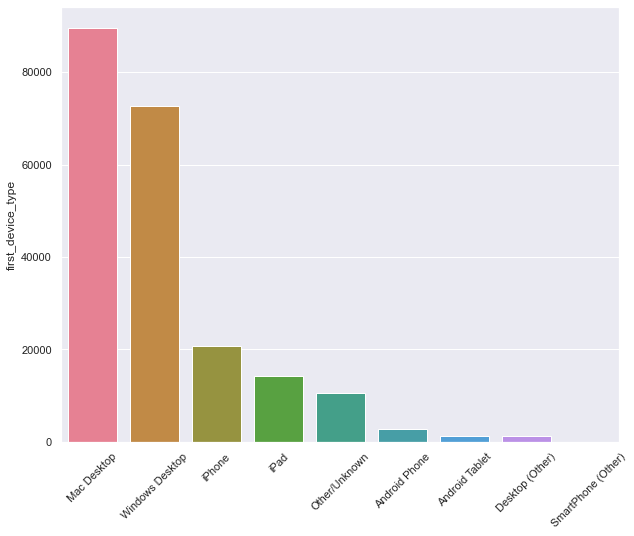

In [87]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['first_device_type'].value_counts().index,train_users['first_device_type'].value_counts(),palette="husl")
plt.xticks(rotation=45)

**When did the customers joined AirBnB?**

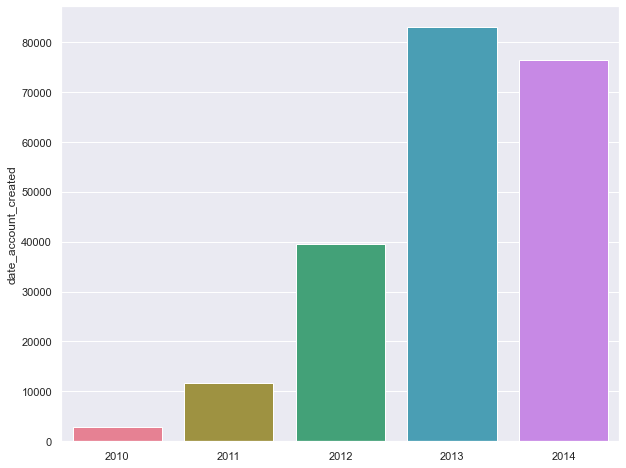

In [88]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_account_created'].dt.year.value_counts().index,train_users['date_account_created'].dt.year.value_counts(),palette="husl")

**When did customers do there first booking?**

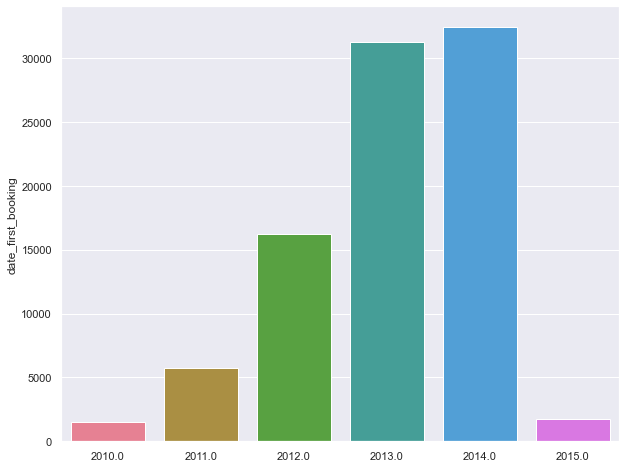

In [89]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_first_booking'].dt.year.value_counts().index,train_users['date_first_booking'].dt.year.value_counts(),palette="husl")

### Inference from the data given above

- In terms of gender, females are more active on AirBnB then main. And majority of the users havent specfied their gender
- A major chunk of people just join the website but don't book a destination(NDF). US is the most popular destination followed by other locations, france and italy.
- Majority of our users join via basic then via facebook
- In terms of users, we see high values in the range 20-40 peaking at ~30
- In terms of language major users english, followed by chinese and french
- Majority of the users signed up by Web followed by iOS
- An interesting trend is that major users signed up in 2013 whereas major bookings are done in 2014

# Feature Engineering

**Extracting features from sessions data**

In [136]:
sessions.head()

user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

In [122]:
#finding the nuber of actions/sessions by a user by action
action_count = sessions.groupby(['user_id'])['action'].nunique()
#time given to each action type by a user
action_type_count = sessions.groupby(['user_id', 'action_type'])['secs_elapsed'].agg(['mean','count','max']).unstack()
#rename the columns
action_type_count.columns=action_type_count.columns.map(lambda x: str(x) + '_count')
#concatinating and creating a new dataset
df_secondelapsed=pd.concat([action_count,action_type_count],axis=1)
df_secondelapsed=df_secondelapsed.reset_index()
df_secondelapsed.rename(columns={'index':'id'},inplace=True)
#imputing 0 for NaN as we don't have that data for the user
df_secondelapsed.fillna(0,inplace=True)
df_secondelapsed

id  action  ('mean', '-unknown-')_count  \
0       00023iyk9l      13                     0.000000   
1       0010k6l0om      11                 24606.600000   
2       001wyh0pz8      10                  3696.833333   
3       0028jgx1x1       5                   489.000000   
4       002qnbzfs5      25                  4011.788043   
...            ...     ...                          ...   
135478  zzxox7jnrx      28                 12188.538462   
135479  zzy7t0y9cm       7                     0.000000   
135480  zzysuoqg6x       3                  1533.000000   
135481  zzywmcn0jv      12                260098.500000   
135482  zzzlylp57e      19                 30374.500000   

        ('mean', 'booking_request')_count  ('mean', 'booking_response')_count  \
0                                     0.0                                 0.0   
1                                     0.0                                 0.0   
2                                     0.0                                 0.0   
3                                     0.0                                 0.0   
4                                 70986.0                                 0.0   
...                                   ...                                 ...   
135478                                0.0                                 0.0   
135479                                0.0                                 0.0   
135480                                0.0                                 0.0   
135481                                0.0                                 0.0   
135482                            13197.0                                 0.0   

        ('mean', 'click')_count  ('mean', 'data')_count  \
0                 147672.750000              782.555556   
1                   4122.125000            15138.444444   
2                   2406.000000              775.000000   
3                  22200.222222             1720.600000   
4                   4602.307143             2098.107143   
...                         ...                     ...   
135478              8547.960000             2255.000000   
135479             13140.000000            15594.666667   
135480                 0.000000              198.000000   
135481             31782.500000             6620.769231   
135482              3047.136364             3939.352941   

        ('mean', 'message_post')_count  ('mean', 'modify')_count  \
0                          129817.0000                       0.0   
1                               0.0000                       0.0   
2                               0.0000                       0.0   
3                               0.0000                       0.0   
4                           20327.1875                       0.0   
...                                ...                       ...   
135478                          0.0000                       0.0   
135479                          0.0000                       0.0   
135480                          0.0000                       0.0   
135481                     300659.5000                       0.0   
135482                       8866.0000                       0.0   

        ('mean', 'partner_callback')_count  ...  ('max', '-unknown-')_count  \
0                                      0.0  ...                         0.0   
1                                      0.0  ...                     93024.0   
2                                      0.0  ...                     17595.0   
3                                      0.0  ...                       489.0   
4                                      0.0  ...                     90588.0   
...                                    ...  ...                         ...   
135478                                 0.0  ...                     49938.0   
135479                                 0.0  ...                         0.0   
135480                                 0.0  ...                      1533.0   
135481            

**Dealing with test and train data together to get same number of features after one hot encoding**

In [98]:
completedata=pd.concat((train_users.drop(['country_destination'], axis=1), test_users), axis = 0, ignore_index= True)
completedata

id date_account_created timestamp_first_active  \
0       gxn3p5htnn           2010-06-28    2009-03-19 04:32:55   
1       820tgsjxq7           2011-05-25    2009-05-23 17:48:09   
2       4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47   
3       bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29   
4       87mebub9p4           2010-09-14    2009-12-08 06:11:05   
...            ...                  ...                    ...   
275542  cv0na2lf5a           2014-09-30    2014-09-30 23:52:32   
275543  zp8xfonng8           2014-09-30    2014-09-30 23:53:06   
275544  fa6260ziny           2014-09-30    2014-09-30 23:54:08   
275545  87k0fy4ugm           2014-09-30    2014-09-30 23:54:30   
275546  9uqfg8txu3           2014-09-30    2014-09-30 23:59:01   

       date_first_booking     gender   age signup_method  signup_flow  \
0                     NaT  -unknown-   NaN      facebook            0   
1                     NaT       MALE  38.0      facebook            0   
2              2010-08-02     FEMALE  56.0         basic            3   
3              2012-09-08     FEMALE  42.0      facebook            0   
4              2010-02-18  -unknown-  41.0         basic            0   
...                   ...        ...   ...           ...          ...   
275542                NaT  -unknown-  31.0         basic            0   
275543                NaT  -unknown-   NaN         basic           23   
275544                NaT  -unknown-   NaN         basic            0   
275545                NaT  -unknown-   NaN         basic            0   
275546                NaT     FEMALE  49.0         basic            0   

       language affiliate_channel affiliate_provider first_affiliate_tracked  \
0            en            direct             direct               untracked   
1            en               seo             google               untracked   
2            en            direct             direct               untracked   
3            en            direct             direct               untracked   
4            en            direct             direct               untracked   
...         ...               ...                ...                     ...   
275542       en            direct             direct               untracked   
275543       ko            direct             direct               untracked   
275544       de            direct             direct                  linked   
275545       en         sem-brand             google                     omg   
275546       en             other              other           tracked-other   

       signup_app first_device_type first_browser  
0             Web       Mac Desktop        Chrome  
1             Web       Mac Desktop        Chrome  
2             Web   Windows Desktop            IE  
3             Web       Mac Desktop       Firefox  
4             Web       Mac Desktop        Chrome  
...           ...               ...           ...  
275542        Web   Windows Desktop            IE  
275543    Android     Android Phone     -unknown-  
275544        Web   Windows Desktop       Firefox  
275545        Web       Mac Desktop        Safari  
275546        Web   Windows Desktop        Chrome  

[275547 rows x 15 columns]

In [99]:
#Adding sessions data to it
completedata=completedata.merge(df_secondelapsed,how="left",left_on="id",right_on="id")
completedata

id date_account_created timestamp_first_active  \
0       gxn3p5htnn           2010-06-28    2009-03-19 04:32:55   
1       820tgsjxq7           2011-05-25    2009-05-23 17:48:09   
2       4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47   
3       bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29   
4       87mebub9p4           2010-09-14    2009-12-08 06:11:05   
...            ...                  ...                    ...   
275542  cv0na2lf5a           2014-09-30    2014-09-30 23:52:32   
275543  zp8xfonng8           2014-09-30    2014-09-30 23:53:06   
275544  fa6260ziny           2014-09-30    2014-09-30 23:54:08   
275545  87k0fy4ugm           2014-09-30    2014-09-30 23:54:30   
275546  9uqfg8txu3           2014-09-30    2014-09-30 23:59:01   

       date_first_booking     gender   age signup_method  signup_flow  \
0                     NaT  -unknown-   NaN      facebook            0   
1                     NaT       MALE  38.0      facebook            0   
2              2010-08-02     FEMALE  56.0         basic            3   
3              2012-09-08     FEMALE  42.0      facebook            0   
4              2010-02-18  -unknown-  41.0         basic            0   
...                   ...        ...   ...           ...          ...   
275542                NaT  -unknown-  31.0         basic            0   
275543                NaT  -unknown-   NaN         basic           23   
275544                NaT  -unknown-   NaN         basic            0   
275545                NaT  -unknown-   NaN         basic            0   
275546                NaT     FEMALE  49.0         basic            0   

       language affiliate_channel  ... ('max', '-unknown-')_count  \
0            en            direct  ...                        NaN   
1            en               seo  ...                        NaN   
2            en            direct  ...                        NaN   
3            en            direct  ...                        NaN   
4            en            direct  ...                        NaN   
...         ...               ...  ...                        ...   
275542       en            direct  ...                    18262.0   
275543       ko            direct  ...                     1601.0   
275544       de            direct  ...                     6086.0   
275545       en         sem-brand  ...                    26491.0   
275546       en             other  ...                   575816.0   

       ('max', 'booking_request')_count ('max', 'booking_response')_count  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4                                   NaN                               NaN   
...                                 ...                               ...   
275542                              0.0                               0.0   
275543                              0.0                               0.0   
275544                              0.0                               0.0   
275545                              0.0                               0.0   
275546                              0.0                               0.0   

       ('max', 'click')_count ('max', 'data')_count  \
0                         NaN                   NaN   
1                         NaN                   NaN   
2                         NaN                   NaN   
3                         NaN                   NaN   
4                         NaN                   NaN   
...                       ...                   ...   
275542              1551558.0               50839.0   
275543                    0.0                   0.0   
275544                60438.0               32319.0   
275545               253296.0             

In [100]:
#Age of 2014 isn't possible and 1 is also not possible so capping the age and converting them to Nan'S
completedata.loc[completedata.age > 100, 'age'] = np.nan
completedata.loc[completedata.age < 13, 'age'] = np.nan

In [101]:
#Finding the Nan's by a user
completedata['nans'] = np.sum([
    (completedata['age'] == np.nan),
    (completedata['gender'] == '-unknown-'),
    (completedata['language'] == '-unknown-'),
    (completedata['first_affiliate_tracked'] == 'untracked'),
    (completedata['first_browser'] == '-unknown-')
], axis=0)

In [102]:
def extract_elements_date(data,feature):
    y=feature+'_year'
    data[y]=data[feature].dt.year
    m=feature+'_month'
    data[m]=data[feature].dt.month
    d=feature+'_date'
    data[d]=data[feature].dt.day
    

In [103]:
#Extracting columns
extract_elements_date(completedata,'date_account_created')
extract_elements_date(completedata,'date_first_booking')
extract_elements_date(completedata,'timestamp_first_active')
completedata['timestamp_first_active_hour']=completedata['timestamp_first_active'].dt.hour

#Dropping columns
completedata=completedata.drop(['id'],axis=1)
completedata=completedata.drop(['date_account_created'],axis=1)
completedata=completedata.drop(['date_first_booking'],axis=1)
completedata=completedata.drop(['timestamp_first_active'],axis=1)

In [104]:
completedata.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

   ... date_account_created_year  date_account_created_month  \
0  ...                      2010                           6   
1  ...                      2011                           5   
2  ...                      2010                           9   
3  ...                      2011                          12   
4  ...                      2010                           9   

   date_account_created_date  date_first_booking_year  \
0                         28                      NaN   
1                         25                      NaN   
2                         28                   2010.0   
3                          5                   2012.0   
4                         14                   2010.0   

   date_first_booking_month  date_first_booking_date  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       8.0                      2.0   
3                       9.0                      8.0   
4                       2.0                     18.0   

   timestamp_first_active_year  timestamp_first_active_month  \
0                         2009                             3   
1                         2009                             5   
2                         2009                             6   
3                         2009                            10   
4                         2009                            12   

   timestamp_first_active_date  timestamp_first_active_hour  
0                           19                            4  
1                           23                           17  
2                            9                           23  
3                           31                            6  
4                            8                            6  

[5 rows x 53 columns]

In [105]:
#Making singup flow catgorical
completedata['signup_flow']=completedata['signup_flow'].astype('str')

def create_dummyvariables(data,columname):
    col=pd.get_dummies(data[columname], prefix=columname).iloc[:, 1:] #Taking all columns after the 0th column for k-1 dummy variables
    data=pd.concat([data, col], axis=1)
    data=data.drop([columname],axis=1)
    return data

categorical_features=['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app',
                    'first_device_type','first_browser']

for i in categorical_features:
    completedata=create_dummyvariables(completedata,i)

completedata.head()

age  action  ('mean', '-unknown-')_count  \
0   NaN     NaN                          NaN   
1  38.0     NaN                          NaN   
2  56.0     NaN                          NaN   
3  42.0     NaN                          NaN   
4  41.0     NaN                          NaN   

   ('mean', 'booking_request')_count  ('mean', 'booking_response')_count  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   ('mean', 'click')_count  ('mean', 'data')_count  \
0                      NaN                     NaN   
1                      NaN                     NaN   
2                      NaN                     NaN   
3                      NaN                     NaN   
4                      NaN                     NaN   

   ('mean', 'message_post')_count  ('mean', 'modify')_count  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   ('mean', 'partner_callback')_count  ...  first_browser_Silk  \
0                                 NaN  ...                   0   
1                                 NaN  ...                   0   
2                                 NaN  ...                   0   
3                                 NaN  ...                   0   
4                                 NaN  ...                   0   

   first_browser_SiteKiosk  first_browser_SlimBrowser  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   first_browser_Sogou Explorer  first_browser_Stainless  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   first_browser_TenFourFox  first_browser_TheWorld Browser  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   first_browser_UC Browser  first_browser_Yandex.Browser  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   first_browser_wOSBrowser  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 186 columns]

In [106]:
#Finding Null Entries
print("The null values in the dataset are:")
df=pd.DataFrame(np.sum(completedata.isnull(),axis=0))
df[[0]]=(df[[0]]/completedata.shape[0])*100
df

The null values in the dataset are:


0
age                                 43.410017
action                              50.831256
('mean', '-unknown-')_count         50.831256
('mean', 'booking_request')_count   50.831256
('mean', 'booking_response')_count  50.831256
...                                       ...
first_browser_TenFourFox             0.000000
first_browser_TheWorld Browser       0.000000
first_browser_UC Browser             0.000000
first_browser_Yandex.Browser         0.000000
first_browser_wOSBrowser             0.000000

[186 rows x 1 columns]

- It can be seen from the above analysis that ~58% of the entries for date first booked are empty, hence, for the time being we will be dropping these values.
- Imputing mean age for NaN
- Since we have a lot of NaN's in sec_elapsed_mean we are currently imputing it with 0

In [108]:
#imputing mean age
completedata['age'].fillna(completedata['age'].mean(),inplace=True)

In [109]:
completedata.fillna(0,inplace=True)

In [61]:
completedata['Sec_elapsed_mean'].fillna(0,inplace=True)
completedata['Sec_elapsed_count'].fillna(0,inplace=True)
completedata['Sec_elapsed_max'].fillna(0,inplace=True)

In [110]:
completedata=completedata.drop(['date_first_booking_year'],axis=1)
completedata=completedata.drop(['date_first_booking_month'],axis=1)
completedata=completedata.drop(['date_first_booking_date'],axis=1)

In [111]:
completedata = completedata.loc[:,~completedata.columns.duplicated()]
completedata.head()

age  action  ('mean', '-unknown-')_count  \
0  36.055043     0.0                          0.0   
1  38.000000     0.0                          0.0   
2  56.000000     0.0                          0.0   
3  42.000000     0.0                          0.0   
4  41.000000     0.0                          0.0   

   ('mean', 'booking_request')_count  ('mean', 'booking_response')_count  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   ('mean', 'click')_count  ('mean', 'data')_count  \
0                      0.0                     0.0   
1                      0.0                     0.0   
2                      0.0                     0.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ('mean', 'message_post')_count  ('mean', 'modify')_count  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   

   ('mean', 'partner_callback')_count  ...  first_browser_Silk  \
0                                 0.0  ...                   0   
1                                 0.0  ...                   0   
2                                 0.0  ...                   0   
3                                 0.0  ...                   0   
4                                 0.0  ...                   0   

   first_browser_SiteKiosk  first_browser_SlimBrowser  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   first_browser_Sogou Explorer  first_browser_Stainless  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   first_browser_TenFourFox  first_browser_TheWorld Browser  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   first_browser_UC Browser  first_browser_Yandex.Browser  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   first_browser_wOSBrowser  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 183 columns]

In [112]:
X=completedata.loc[0:train_users.shape[0]-1,:]
test_df=completedata.loc[train_users.shape[0]:,:]

In [113]:
#getting label for countries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(train_users['country_destination'])
y.shape

(213451,)

In [114]:
#The number of rows and columns for X
print("The shape of X is {}".format(X.shape))

The shape of X is (213451, 183)


In [115]:
#dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,stratify=y)

### Evalutation Metric

In [138]:
"""Metrics to compute the model performance."""

import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

# Fitting a Baseline Model Random Forest Model

In [116]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Test Random Forest Classifier on test set: 0.62


In [30]:
print("The NDCG Score is {}".format(ndcg_score(y_test,rf_clf.predict_proba(X_test),k=5)))

The NDCG Score is 0.8069340636638306


**Understanding the Hyperparameters of Random Forest Classifier**

- n_estimators: The number of decision trees in the random forest model
- max_depth: maximmum depth of each tree. By default -> None which means each node will expand unless every leaf is pure i.e. same class
- min_samples_split: minimum samples required to split an internal leaf node. By default -> 2 meaning we need atleast two samples to split
- min_samples_leaf: minimum number of samples required to be at a leaf node. By default we have 1 implying there should be at least one sample that classifies

In [32]:
#Using GridSearch CV
param_grid={'n_estimators': range(100,110)}

rf_cv = GridSearchCV(rf_clf, param_grid, cv=5, verbose=0,n_jobs=4,scoring='accuracy')
best_model=rf_cv.fit(X_train,y_train.values.ravel())

print("Using Grid Search CV")
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

Using Grid Search CV
tuned hpyerparameters :(best parameters)  {'n_estimators': 103}
accuracy : 0.6009302948164508


In [255]:
rf_clf = RandomForestClassifier(n_estimators=103)

rf_clf.fit(X_train, y_train.values)

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test.values.ravel())))
print("The NDCG Score is {}".format(ndcg_score(y_test.to_numpy(),rf_clf.predict_proba(X_test),k=5)))

Accuracy of Test Random Forest Classifier on test set: 0.60
The NDCG Score is 0.7974843864018611


In [56]:
#Using GridSearch CV
param_grid={'n_estimators': np.arange(100,700,100)}

rf_cv = GridSearchCV(rf_clf, param_grid, cv=5, verbose=0,n_jobs=4,scoring='accuracy')
best_model=rf_cv.fit(X_train,y_train)

print("Using Grid Search CV")
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

Using Grid Search CV
tuned hpyerparameters :(best parameters)  {'n_estimators': 400}
accuracy : 0.5993708797644145


In [46]:
rf_clf = RandomForestClassifier(n_estimators=400)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))
print("The NDCG Score is {}".format(ndcg_score(y_test,rf_clf.predict_proba(X_test),k=5)))

Accuracy of Test Random Forest Classifier on test set: 0.60
The NDCG Score is 0.8037287097173264


# Using XGBoost

In [118]:
from xgboost import XGBClassifier

xgbclass = XGBClassifier()
xgbclass.fit(X_train, y_train)
print('Accuracy of Test XGB Classifier on test set: {:.2f}'.format(xgbclass.score(X_test, y_test)))

Accuracy of Test XGB Classifier on test set: 0.65


**Understanding the hyper paramaters**

In [123]:
xgbclass

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Finding the important features**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

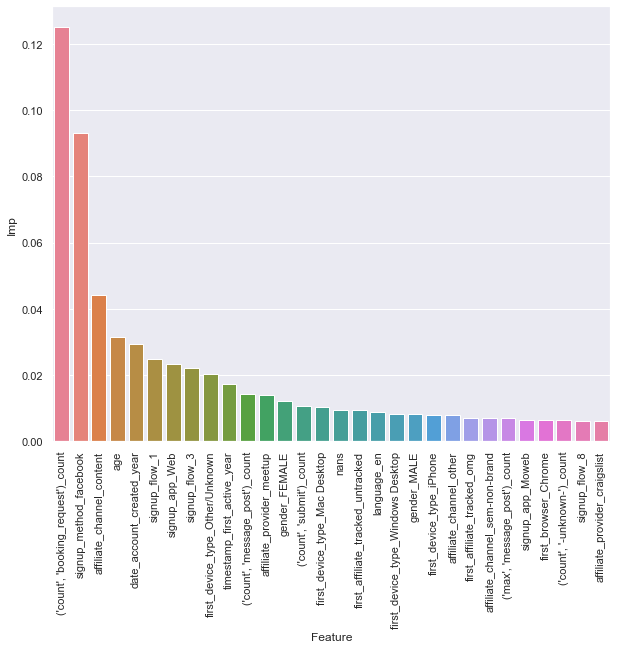

In [137]:
important_df=pd.DataFrame(np.column_stack([X_train.columns,xgbclass.feature_importances_]),columns=['Feature','Imp'])
important_df=important_df.sort_values(by=['Imp'],ascending=False)[0:30]

#plotting the values
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(important_df['Feature'],important_df['Imp'],palette="husl")
plt.xticks(rotation=90)

### Preparing the Dataset for testing and getting the submission results

*Replace the modelname here*

In [119]:
ytest_pred=xgbclass.predict_proba(test_df)

In [120]:
idx=test_users['id']
ids=[]
cts=[]
for i in range(len(idx)):
    ids += [idx[i]] * 5
    cts += le.inverse_transform(np.argsort(ytest_pred[i])[::-1])[:5].tolist()
submission=pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [121]:
submission=submission.set_index('id')
submission1=submission.to_csv('output_test.csv')
submission

country
id                
5uwns89zht     NDF
5uwns89zht      US
5uwns89zht   other
5uwns89zht      FR
5uwns89zht      AU
...            ...
9uqfg8txu3     NDF
9uqfg8txu3      US
9uqfg8txu3   other
9uqfg8txu3      IT
9uqfg8txu3      GB

[310480 rows x 1 columns]

**Challenges Faced**

- New Evaluation Metric: Understand why its used
- Creating dummy variables one-hot encoding vs integer mapping
- Understanding hyperparamaters of all the models used and how to vary them
- Sometimes getting data and feature engineering is more important than the model itself 

**Future Work**

- Hyperparamater Tuning
- Feature Selection
- Imbalanced Dataset